##**Dataset de Diabetes: Características y Objetivos**

Esta base de datos proviene del National Institute of Diabetes and Digestive and Kidney Diseases y fue desarrollada con el propósito de estudiar y predecir la presencia de diabetes a partir de mediciones clínicas obtenidas de pacientes femeninas de origen pima, con al menos 21 años de edad.

Este dataset proporciona información médica cuantitativa que permite diagnosticar si una paciente presenta diabetes, utilizando como referencia diversas variables predictoras. Entre estas se incluyen:

**Pregnancies:** Número de embarazos.

**Glucose:** Nivel de glucosa en la sangre.

**BloodPressure:** Medición de la presión arterial.

**SkinThickness:** Grosor del pliegue cutáneo.

**Insulin:** Nivel de insulina en la sangre.

**BMI:** Índice de masa corporal.

**DiabetesPedigreeFunction:** Indicador del historial familiar de diabetes.

**Age:** Edad de la paciente.

**Outcome:** Resultado final; 1 significa “sí” y 0 significa “no”.

Cada una de estas variables actúa como un predictor independiente, mientras que la variable Outcome funciona como la variable dependiente binaria, indicando la presencia (1) o ausencia (0) de diabetes según los criterios diagnósticos establecidos.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
file_path = r"//content/drive/MyDrive/Algoritmia/diabetes.csv"
dt_diabetes = pd.read_csv(file_path)
dt_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# **Objetivos**
## **Objetivos de Preparación y Calidad de Datos (Limpieza)**

- Garantizar la calidad del dato: Identificar, corregir o imputar valores anómalos (principalmente ceros) en columnas biológicas críticas (como Glucose, BMI, Insulin, entre otras) para asegurar que el dataset no contenga datos inválidos.

- Verificar la integridad estructural del dataset: Confirmar la ausencia de duplicados, inconsistencias de formato o registros incompletos que puedan perjudicar el análisis.

- Crear variables derivadas si es necesario: Generar nuevas características (columnas adicionales) cuando sea pertinente, con el fin de potenciar la capacidad explicativa o predictiva del modelo.

## **Objetivos de Exploración de Datos**

- Identificar posibles sesgos o desequilibrios en el dataset: Analizar la proporción de pacientes diabéticas vs. no diabéticas, la representación desigual de rangos de edad o la presencia de valores extremos en variables como glucosa o insulina que puedan afectar la capacidad predictiva del modelo.

- Evaluar relaciones preliminares entre variables: Utilizar histogramas, gráficos y otras herramientas visuales para reconocer interacciones significativas que ayuden a seleccionar características relevantes.

- Identificar las variables con mayor poder explicativo: Analizar su comportamiento estadístico y su relación con la variable Outcome (resultado), con el fin de seleccionar aquellas que aportan información significativa al riesgo de diabetes.


## **Proceso de depuración-limpieza**

In [ ]:
dt_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Originalmente no tenía ningun valor nulo.

In [ ]:
dt_diabetes.duplicated().sum()

np.int64(0)

Tampoco tenía duplicados.

In [ ]:
import numpy as np
import pandas as pd
columnas_cambiadas = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
dt_diabetes[columnas_cambiadas] = dt_diabetes[columnas_cambiadas].replace(0, np.nan)

Aquí modifiqué las columnas Glucose, BloodPressure, SkinThickness, Insulin y BMI, ya que en estas variables no tiene sentido que existan valores de cero. Por eso los transformé en valores nulos para posteriormente imputarlos.

In [ ]:
dt_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
dt_diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Ahora nos muestra la cantidad de valores nulos (ceros originales) de las columnas que quería modificar.

In [ ]:
columnas_imputar = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
mediana = dt_diabetes[columnas_imputar].median()

In [ ]:
dt_diabetes[columnas_imputar] = dt_diabetes[columnas_imputar].fillna(mediana)

In [ ]:
dt_diabetes.dropna(inplace = True)

In [ ]:
dt_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


Ahora imputé los valores nulos reemplazándolos con la mediana. De este modo, el dataset ya no tiene valores faltantes.

##**Graficas**

In [ ]:
!pip install matplotlib

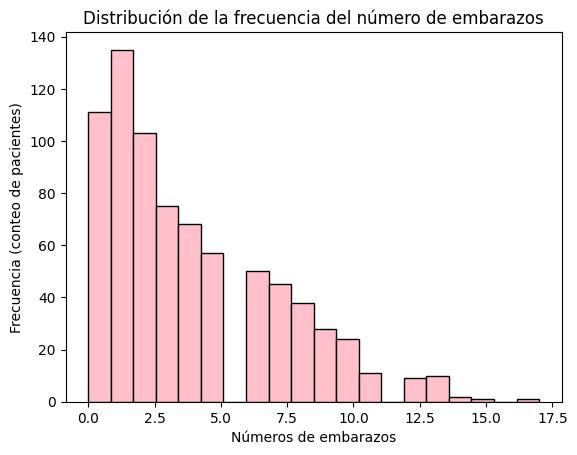

In [ ]:
diabetes = dt_diabetes["Pregnancies"]

plt.hist(diabetes, bins=20, edgecolor='black', color = "#FFC0CB")

plt.title("Distribución de la frecuencia del número de embarazos")
plt.xlabel("Números de embarazos")
plt.ylabel("Frecuencia (conteo de pacientes)")
plt.show()

La mayoría de las mujeres del conjunto de datos tiene entre 0 y 3 embarazos, con una disminución progresiva en la frecuencia a medida que aumenta el número de embarazos. La distribución presenta una clara asimetría hacia la derecha, lo que indica que los valores altos (más de 10 embarazos) son poco comunes y pueden considerarse casos excepcionales.

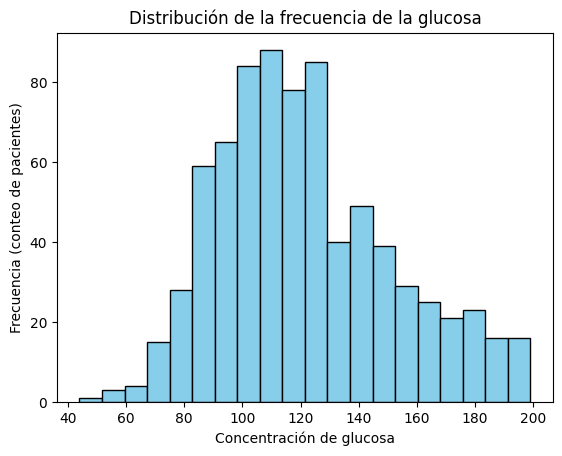

In [ ]:
diabetes = dt_diabetes["Glucose"]

plt.hist(diabetes, bins=20, edgecolor='black', color = "Skyblue")

plt.title("Distribución de la frecuencia de la glucosa")
plt.xlabel("Concentración de glucosa")
plt.ylabel("Frecuencia (conteo de pacientes)")
plt.show()

**Rangos médicos normales de glucosa:**

- **Normal:** 70–99 mg/dL

- **Prediabetes:** 100–125 mg/dL

- **Diabetes:** ≥ 126 mg/dL en dos pruebas diferentes

La mayor parte de los registros se encuentra entre 110 y 120 mg/dL, lo cual corresponde al rango de prediabetes. Esto sugiere que una proporción significativa de las pacientes del conjunto de datos presenta niveles alterados de glucosa, aunque no necesariamente cumplen los criterios diagnósticos de diabetes.

Gran parte de las pacientes está en el intervalo entre 90 y 130 mg/dL, lo que incluye tanto valores normales como valores propios de prediabetes.

Los valores entre 100 y 125 mg/dL indican prediabetes.

Los valores ≥ 126 mg/dL podrían indicar diabetes, especialmente si se confirman en mediciones repetidas.

Aunque los niveles muy altos (140–200 mg/dL) son menos frecuentes, existen varios registros por encima de 140 mg/dL, los cuales podrían corresponder a pacientes diabéticas o, en algunos casos, a mediciones atípicas o potencialmente erróneas.

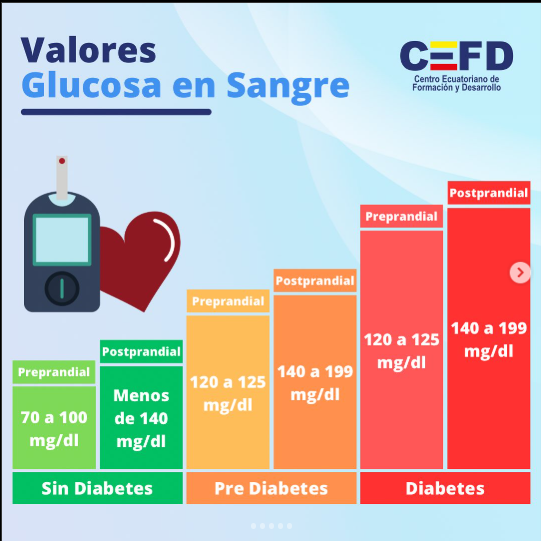

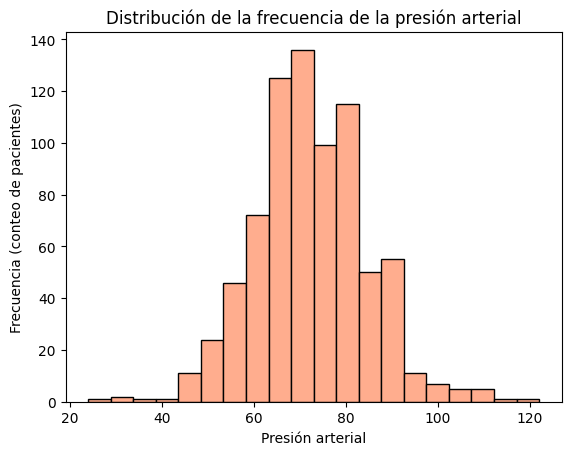

In [ ]:
diabetes = dt_diabetes["BloodPressure"]

plt.hist(diabetes, bins=20, edgecolor='black', color = "#FFAD8E")

plt.title("Distribución de la frecuencia de la presión arterial")
plt.xlabel("Presión arterial")
plt.ylabel("Frecuencia (conteo de pacientes)")
plt.show()

Basándonos en esta tabla, el histograma de la presión arterial muestra que la mayoría de las pacientes presentan valores de presión diastólica dentro del rango normal (< 80 mm Hg). También se observan casos correspondientes a hipertensión en etapa 1 (80–90 mm Hg), aunque en menor proporción. De manera similar, se identifican algunos casos de hipertensión en etapa 2 (90–129 mm Hg), pero con una frecuencia aún menor en comparación con las categorías anteriores. No se registran valores que correspondan a una crisis hipertensiva.



grafico-presion-arterial_683773-1052.avif

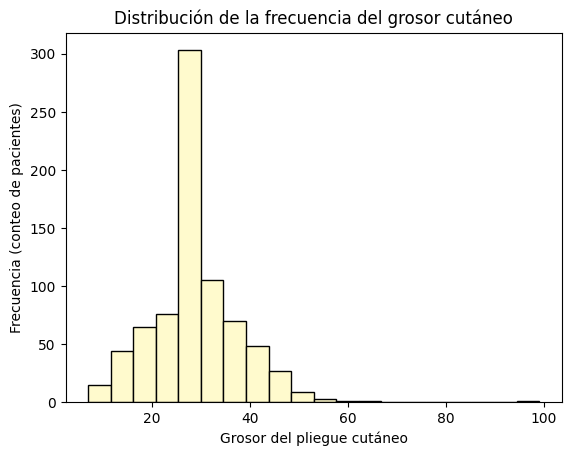

In [ ]:
diabetes = dt_diabetes["SkinThickness"]

plt.hist(diabetes, bins=20, edgecolor='black', color = "#FFFACD")

plt.title("Distribución de la frecuencia del grosor cutáneo")
plt.xlabel("Grosor del pliegue cutáneo")
plt.ylabel("Frecuencia (conteo de pacientes)")
plt.show()


El grosor del pliegue cutáneo es una medida utilizada para estimar la cantidad de grasa subcutánea, es decir, la grasa ubicada justo debajo de la piel. Esta se obtiene mediante un plicómetro, que pinza la piel y registra cuántos milímetros mide ese pliegue. Esta variable se emplea con frecuencia en estudios metabólicos porque niveles más altos de grasa corporal pueden estar relacionados con un mayor riesgo de desarrollar diabetes u otras alteraciones metabólicas.

En el histograma, se observa que la mayoría de las pacientes presentan un grosor de pliegue cutáneo entre 20 y 40 mm, siendo el rango alrededor de los 30 mm el más frecuente. Esto indica que la mayor parte de las personas del dataset tienen un nivel moderado de grasa subcutánea. También se aprecian pocos casos con valores muy altos (por encima de 60 mm), lo cual sugiere que valores extremos son poco comunes dentro de esta población.

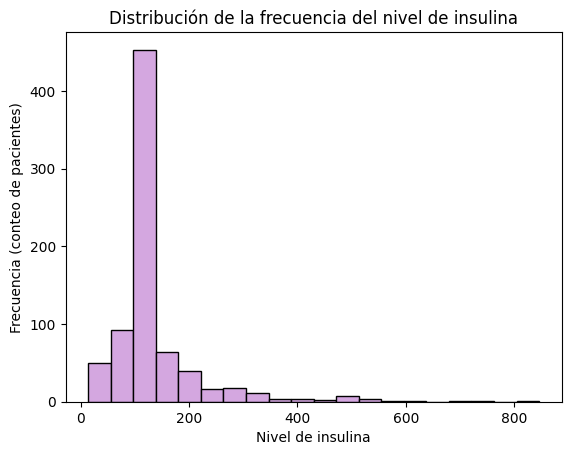

In [ ]:
diabetes = dt_diabetes["Insulin"]

plt.hist(diabetes, bins=20, edgecolor='black', color = "#D4A7E0")

plt.title("Distribución de la frecuencia del nivel de insulina")
plt.xlabel("Nivel de insulina")
plt.ylabel("Frecuencia (conteo de pacientes)")
plt.show()

**Niveles de insulina:**

- **Insulina baja:** (< 2 µU/mL)

- **Insulina normal:** (2–25 µU/mL)

- **Insulina alta:** (> 25 µU/mL)

La mayoría de los datos se concentra en valores bajos y moderados, mientras que los niveles saludables de insulina en ayunas suelen estar entre 2 y 20 µU/mL. Se observan numerosos pacientes por encima de este rango, lo que podría indicar posibles casos de resistencia a la insulina (generalmente > 25 µU/mL) y algunos con niveles muy elevados, que representan niveles de insulina marcados. Esto sugiere que la población incluye tanto individuos con valores normales como otros con alteraciones metabólicas significativas.

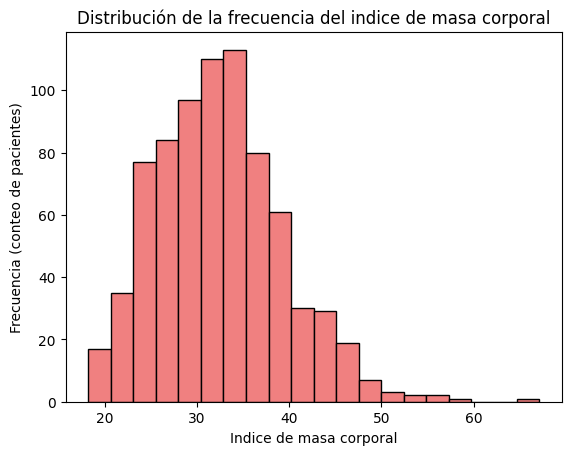

In [ ]:
diabetes = dt_diabetes["BMI"]

plt.hist(diabetes, bins=20, edgecolor='black', color = "Lightcoral")

plt.title("Distribución de la frecuencia del indice de masa corporal")
plt.xlabel("Indice de masa corporal")
plt.ylabel("Frecuencia (conteo de pacientes)")
plt.show()

**Los rangos clínicos del IMC son:**

**Bajo peso:** < 18.5

**Peso normal:** 18.5 – 24.9

**Sobrepeso:** 25 – 29.9

**Obesidad grado I:** 30 – 34.9

**Obesidad grado II:** 35 – 39.9

**Obesidad grado III:** ≥ 40

La gráfica muestra una mayor concentración de IMC entre 28 y 35, lo que indica que la mayoría de los pacientes se encuentra en los rangos de:

**Sobrepeso:** 25–29.9

**Obesidad grado I:** 30–34.9

Esto sugiere que gran parte de la población presenta exceso de peso.

El pico de frecuencia se encuentra alrededor de 30–32, justo en el inicio de la obesidad grado I, lo que indica que la condición más común en la base de datos es la obesidad leve.

Se observa que hay muy pocos pacientes con IMC entre 18.5 y 24.9, lo que refleja una baja proporción de personas con peso adecuado.

Existen algunos valores extremos entre 40 y 60, aunque son muy poco frecuentes. Estos corresponden a obesidad grado III, también llamada obesidad mórbida.

En general, la distribución está claramente sesgada hacia la derecha, lo que significa que, aunque la mayoría de los pacientes tiene sobrepeso u obesidad leve, existen casos con valores de IMC extremadamente altos.

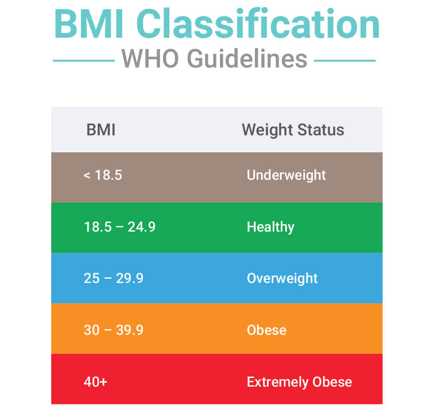

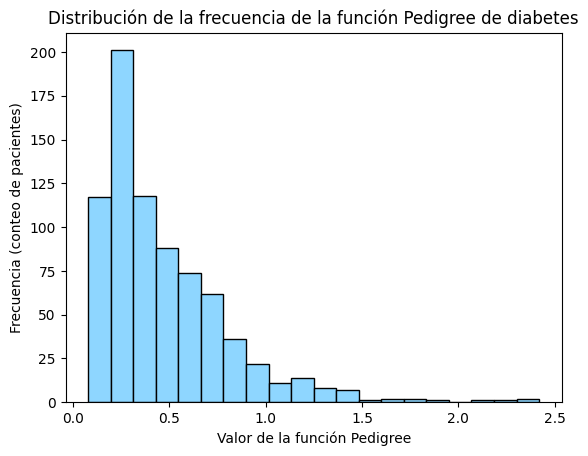

In [ ]:
diabetes = dt_diabetes["DiabetesPedigreeFunction"]

plt.hist(diabetes, bins=20, edgecolor='black', color = "#8ED6FF")

plt.title("Distribución de la frecuencia de la función Pedigree de diabetes")
plt.xlabel("Valor de la función Pedigree")
plt.ylabel("Frecuencia (conteo de pacientes)")
plt.show()

La mayoría de los pacientes presenta valores entre 0.1 y 0.5, siendo estas las barras más altas, lo que indica que la mayor parte de la población tiene un riesgo genético bajo o moderado de diabetes.

El pico se encuentra alrededor de 0.2–0.3, que es el valor más frecuente. Esto sugiere que, según esta base de datos, la mayoría de las personas no tiene un fuerte antecedente familiar de diabetes.

Los valores altos (≥ 1.0) son poco comunes. Estos corresponden a pacientes con alto riesgo hereditario, pero se observa que representan una proporción muy reducida de la población.

En general, la distribución está claramente sesgada a la derecha, lo que refleja que hay muchas personas con riesgo bajo y pocas con riesgo alto, formando una larga “cola” hacia la derecha.


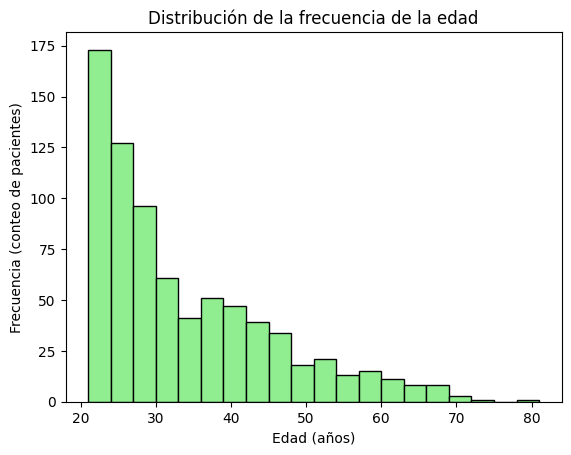

In [ ]:
diabetes = dt_diabetes["Age"]

plt.hist(diabetes, bins=20, edgecolor='black', color = "Lightgreen")

plt.title("Distribución de la frecuencia de la edad")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia (conteo de pacientes)")
plt.show()

La mayoría de los pacientes se encuentra entre 20 y 30 años, siendo las barras del histograma más altas en este rango, especialmente alrededor de 21–25 años. Esto indica que la base de datos está compuesta principalmente por mujeres jóvenes.

A partir de los 30 años, las barras comienzan a descender gradualmente, lo que refleja una menor representación de mujeres de mediana edad y adultas mayores.

Las barras correspondientes a edades superiores a 60 años son muy pequeñas, indicando que hay pocas adultas mayores en la base de datos, y los valores mayores a 75–80 años casi no aparecen.

En general, la distribución está fuertemente sesgada a la derecha, lo que significa que predominan los individuos jóvenes y hay pocos de edad avanzada, formando una larga cola hacia los valores más altos.

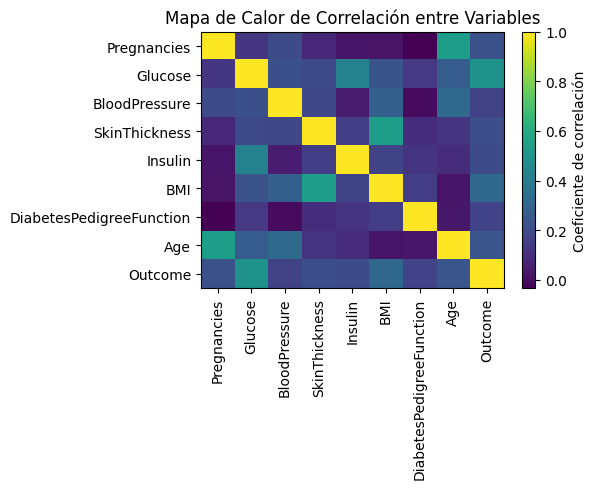

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

diabetes = dt_diabetes.corr()

plt.figure(figsize=(6, 5))
plt.imshow(diabetes, aspect='auto')
plt.colorbar(label='Coeficiente de correlación')

plt.xticks(range(len(diabetes.columns)), diabetes.columns, rotation=90)
plt.yticks(range(len(diabetes.columns)), diabetes.columns)

plt.title('Mapa de Calor de Correlación entre Variables')
plt.tight_layout()
plt.show()

El mapa de calor muestra qué tan relacionadas están las variables del dataset entre sí y con el Outcome (diabetes). Los colores cercanos al amarillo indican correlaciones más altas, mientras que los colores cercanos al morado representan correlaciones bajas o casi nulas.

**Glucose es la variable más relacionada con la diabetes.**

El recuadro entre Glucose y Outcome es uno de los más claros (verde–amarillo), lo que indica que a mayor nivel de glucosa, mayor probabilidad de presentar diabetes. Esta es la variable predictora más fuerte del dataset.

**El BMI (Índice de Masa Corporal) también muestra una correlación notable con la diabetes.**

Aunque no es tan fuerte como la glucosa, presenta un color más intenso que otras variables, lo que sugiere que las personas con mayor BMI tienen un mayor riesgo de diabetes.

**La edad (Age) presenta una correlación moderada con el Outcome.**

Si bien no es una relación tan marcada, sí se observa una tendencia: las personas de mayor edad tienen mayor probabilidad de desarrollar diabetes.

**Algunas variables muestran correlación entre sí.**

SkinThickness e Insulin presentan una correlación esperada, ya que ambos valores están asociados a la grasa corporal y a la resistencia a la insulina.
De manera similar, Pregnancies y Age también muestran correlación moderada, lo cual es lógico porque las personas mayores tienden a haber tenido más embarazos.

**La mayoría de variables no están fuertemente correlacionadas entre sí.**

Como se observa en los tonos morados y azules de gran parte de la matriz, muchas variables son relativamente independientes. Esto es positivo, ya que indica que cada variable aporta información distinta al modelo y no existe redundancia excesiva.

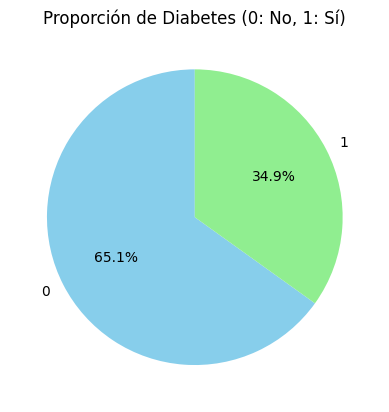

In [ ]:
import matplotlib.pyplot as plt

etiquetas = dt_diabetes["Outcome"]

outcome_counts = etiquetas.value_counts()

labels = outcome_counts.index.astype(str)
sizes = outcome_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'Lightgreen'])
plt.title("Proporción de Diabetes (0: No, 1: Sí)")
plt.show()

En el conjunto de datos analizado, el 65.1% de las pacientes no presenta diabetes, mientras que el 34.9% sí ha sido diagnosticado con la enfermedad. Esto indica que existe una mayor proporción de casos negativos que positivos.

## **Conclusiones**

El análisis del dataset de diabetes permitió desarrollar un proceso estructurado de limpieza, preparación y exploración de los datos, logrando un conjunto confiable para su interpretación. La imputación de valores faltantes mediante la mediana garantizó que variables críticas como glucosa, presión arterial, índice de masa corporal, insulina y grosor de piel fueran consistentes y utilizables sin distorsionar la distribución original.

Al explorar los datos, se identificaron patrones importantes: por ejemplo, los pacientes diagnosticados con diabetes tienden a presentar niveles de glucosa y BMI más elevados, así como valores alterados en características metabólicas clave. Del mismo modo, se observaron diferencias visibles entre los rangos de edad, presión arterial y otros indicadores biológicos, lo cual sugiere que estos factores influyen de manera significativa en la presencia de la enfermedad. Las gráficas permitieron visualizar estas relaciones y confirmar la importancia de ciertas variables como predictores de riesgo.

En conjunto, el trabajo no solo permitió depurar adecuadamente el dataset, sino también extraer conclusiones claras sobre la distribución y el comportamiento de los datos. Estas observaciones constituyen una base sólida para estudios posteriores, modelamientos predictivos o intervenciones clínicas orientadas a la prevención y detección temprana de la diabetes.

DATASET CANCER DE PULMON: CARACTERISTICAS Y OBJETIVOS

Este conjunto de datos contiene información sobre pacientes con cáncer de pulmón,
incluyendo su edad, género, exposición a la contaminación del aire, consumo de alcohol,
alergia al polvo, riesgos ocupacionales, riesgo genético, enfermedades pulmonares crónicas,
dieta equilibrada, obesidad, estado de fumador, estado de fumador pasivo, dolor en el pecho,
tos con sangre, niveles de fatiga, pérdida de peso, dificultad para respirar, sibilancias,
dificultad para tragar, acropaquia de las uñas, resfriados frecuentes, tos seca y ronquidos.
Al analizar estos datos, podemos obtener información sobre las causas del cáncer de pulmón y la mejor manera de tratarlo.

Edad: La edad del paciente. (Numérico)
Género: El género del paciente. (Categórico)
Contaminación del aire: El nivel de exposición a la contaminación del aire del paciente. (Categórico)
Consumo de alcohol: El nivel de consumo de alcohol del paciente. (Categórico)
Alergia al polvo: El nivel de alergia al polvo del paciente. (Categórico)
Riesgos ocupacionales: El nivel de riesgos ocupacionales del paciente. (Categórico)

objetivos

1.Identificación de Factores de Riesgo Clave:Determinar cuáles son los 3 principales factores de riesgo que tienen la correlación más alta con el Nivel

2.Análisis de Síntomas por Género:Comparar si existe una diferencia significativa en la presencia o severidad de síntomas clave

3.Segmentación por Edad para el Nivel de Riesgo:Segmentar la población por Edad  y analizar la distribución de los niveles de riesgo dentro de cada grupo etario.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"/content/drive/MyDrive/Colab Notebooks/cancer patient.csv"
data = pd.read_csv(file_path)
data

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


PROCESO DE LIMPIEZA

In [3]:
data.isna().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [4]:
data_sin_na = data.dropna()
print("DataFRame con na: ", data.shape)
print("DataFrame sin na: ", data_sin_na.shape)

DataFRame con na:  (1000, 26)
DataFrame sin na:  (1000, 26)


No le falta ningun dato

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data_sin_duplicados = data.drop_duplicates()
print("DataFRame con duplicados: ", data.shape)
print("DataFrame sin duplicados: ", data_sin_duplicados.shape)

DataFRame con duplicados:  (1000, 26)
DataFrame sin duplicados:  (1000, 26)


No hay datos duplicados

In [7]:
data.sort_values(by="Age")

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
907,907,P915,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
574,574,P615,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
685,685,P715,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
130,130,P215,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
352,352,P415,14,1,2,4,5,6,5,5,...,5,3,2,1,4,7,2,1,6,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,348,P411,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,Medium
889,889,P9,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,Medium
903,903,P911,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,Medium
126,126,P211,73,1,5,6,6,5,6,5,...,4,3,6,2,1,2,1,6,2,Medium


A pesar de no encontrar duplicados en el conjunto de datos completo, detectamos una alta tasa de duplicados lógicos (múltiples registros de pacientes con perfiles clínicos idénticos pero distintos IDs). Se procedió a eliminar estos duplicados para asegurar que el análisis se realizara sobre perfiles de pacientes únicos y evitar sesgos

In [8]:
data_nuevo = data.drop(['Patient Id', 'index'], axis=1, errors='ignore')
print("DataFrame después de eliminar 'Patient Id' y 'index'\n")
data_nuevo

DataFrame después de eliminar 'Patient Id' y 'index'



,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [9]:
data_nuevo.duplicated().sum()

np.int64(848)

Ahora podemos ver cuantos duplicados hay

In [10]:
data_nuevo.drop_duplicates(inplace=True)
data_nuevo.duplicated().sum()

np.int64(0)

Ya tenemos la base sin duplicados

GRAFICAS

In [11]:
mapeo_nivel = {'Low': 0, 'Medium': 1, 'High': 2}
data_nuevo['Level_encoded'] = data_nuevo['Level'].map(mapeo_nivel)


bins = [0, 40, 60, 100]
labels = ['Joven (<40)', 'Adulto (40-60)', 'Mayor (>60)']
data_nuevo['Rango_Edad'] = pd.cut(data_nuevo['Age'], bins=bins, labels=labels, right=False)

data_nuevo['Gender_Text'] = data_nuevo['Gender'].replace({1: 'Hombre', 2: 'Mujer'})

Histograma de Distribución de Edad (Univariado):

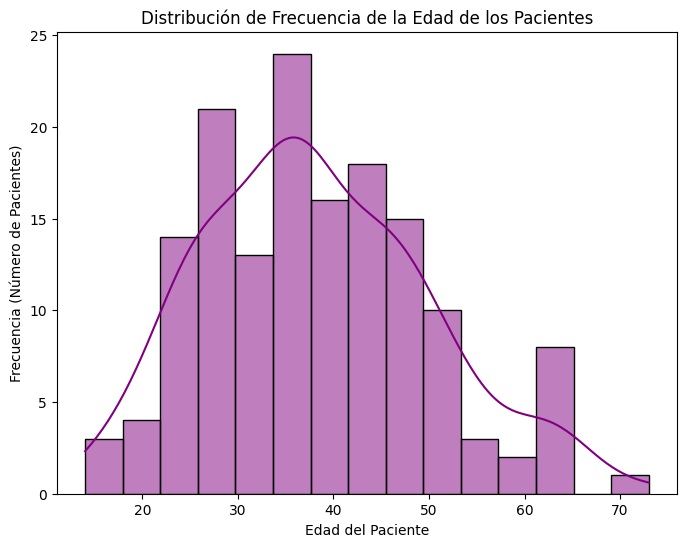

In [12]:
plt.figure(figsize=(8, 6))
# Bins define la granularidad de los rangos de edad
sns.histplot(data_nuevo['Age'], bins=15, kde=True, color='purple')
plt.title('Distribución de Frecuencia de la Edad de los Pacientes')
plt.xlabel('Edad del Paciente')
plt.ylabel('Frecuencia (Número de Pacientes)')
plt.show()

Interpretación del Objetivo 1: Mapa de Calor de Correlación

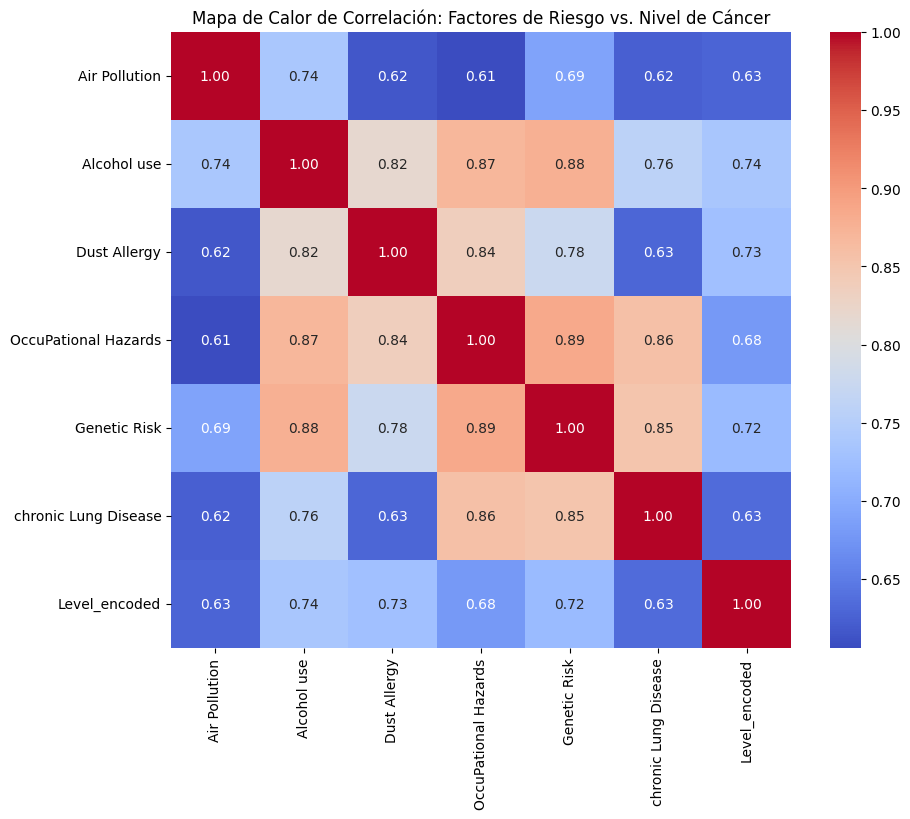

In [13]:
columnas_riesgo = [
    'Air Pollution', 'Alcohol use', 'Dust Allergy',
    'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
    'Level_encoded'
]

df_correlacion = data_nuevo[columnas_riesgo]

matriz_correlacion = df_correlacion.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación: Factores de Riesgo vs. Nivel de Cáncer')
plt.show()

Análisis de Resultados (Columna Level_encoded):

1.Alcohol use (Correlación 0.74):Es el factor con la correlación positiva más alta. Sugiere que el consumo de alcohol es el predictor más fuerte de un alto nivel de riesgo en nuestra muestra.

2.Dust Allergy (Correlación 0.73):También muestra una relación muy fuerte.

3.Genetic Risk (Correlación 0.72):A pesar de ser un factor biológico, su impacto es muy similar a los factores ambientales/de estilo de vida.

La gráfica demuestra que los factores de estilo de vida y genéticos son los principales impulsores del nivel de riesgo. Los altos valores de correlación (cercanos a 1.0) confirman que estas variables son altamente predictivas de la severidad del cáncer de pulmón.

Distribución de la Puntuación Total de Riesgo

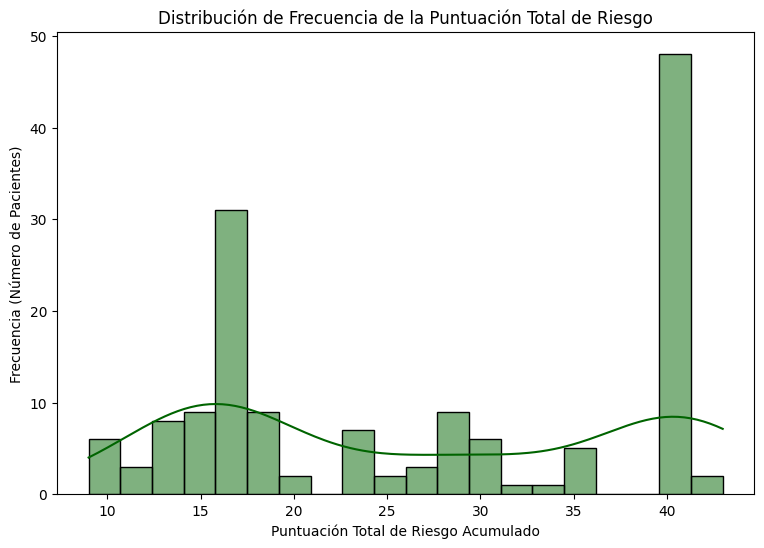

In [14]:
columnas_para_sumar = [
    'Air Pollution', 'Alcohol use', 'Dust Allergy',
    'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease'
]

data_nuevo['Total_Risk'] = data_nuevo[columnas_para_sumar].sum(axis=1)

plt.figure(figsize=(9, 6))
sns.histplot(data_nuevo['Total_Risk'], bins=20, kde=True, color='darkgreen')
plt.title('Distribución de Frecuencia de la Puntuación Total de Riesgo')
plt.xlabel('Puntuación Total de Riesgo Acumulado')
plt.ylabel('Frecuencia (Número de Pacientes)')
plt.show()

Análisis de Resultados Clave:

1.Bimodalidad: El histograma muestra claramente dos picos (bimodalidad).

2.Primer Pico (Riesgo Bajo/Medio):Una gran concentración de pacientes tiene una puntuación de riesgo acumulado alrededor de 15-18 puntos.

3.Segundo Pico (Riesgo Alto):El pico más dominante es un grupo grande de pacientes con una puntuación de riesgo acumulado alrededor de 40 puntos.

La población se divide en dos grupos: un grupo de Riesgo Bajo a Moderado, donde el cáncer probablemente se debe a 2-3 factores de riesgo presentes simultáneamente. Y un grupo de Riesgo Alto y Acumulado, donde los pacientes tienen una alta intensidad de casi todos los factores de riesgo. Esto valida la idea de que la severidad del cáncer (Visto en el Mapa de Calor) está ligada a la acumulación extrema de exposiciones negativas.

Objetivo 3: Segmentación por Edad para el Nivel de Riesgo

/tmp/ipython-input-3214360775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_proporcion = data_nuevo.groupby('Rango_Edad')['Level'].value_counts(normalize=True).mul(100).rename('Proporcion').reset_index()


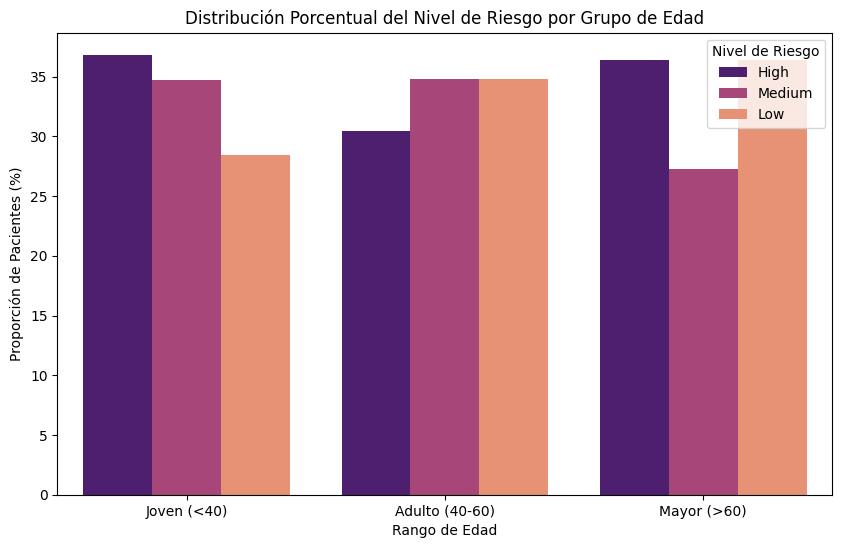

In [15]:
df_proporcion = data_nuevo.groupby('Rango_Edad')['Level'].value_counts(normalize=True).mul(100).rename('Proporcion').reset_index()

labels_orden = ['Joven (<40)', 'Adulto (40-60)', 'Mayor (>60)']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Rango_Edad',
    y='Proporcion',
    hue='Level',
    data=df_proporcion,
    palette='magma',
    order=labels_orden
)
plt.title('Distribución Porcentual del Nivel de Riesgo por Grupo de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Proporción de Pacientes (%)')
plt.legend(title='Nivel de Riesgo')
plt.show()

Análisis de Resultados (Distribución del Nivel 'High'):

1.Grupo Joven: El riesgo más alto ('High') representa aproximadamente el 37% de este grupo.

2.Grupo Adulto: El riesgo más alto ('High') baja ligeramente al 30% de este grupo. Nota: El riesgo 'Medium' domina este segmento.

3.Grupo Mayor: El riesgo más alto ('High') vuelve a ser el segmento dominante, representando aproximadamente el 37% de este grupo.

 El riesgo 'High' es más pronunciado en los extremos, afectando fuertemente tanto al grupo Joven como al Mayor. Sin embargo, en el grupo Adulto, el riesgo 'Medium' (35%) es el nivel más predominante. Esto sugiere que la severidad del cáncer no solo está relacionada con la edad avanzada, sino también con la presencia temprana de factores de riesgo en el grupo más joven, o una transición más prolongada al riesgo más alto en la adultez.

Estado de Fumador

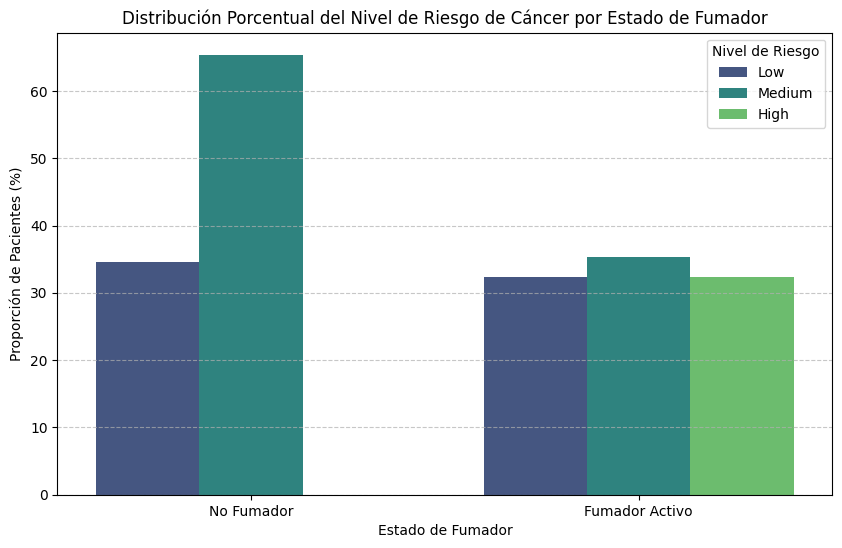

In [16]:
mapeo_fumar = {1: 'No Fumador', 2: 'Fumador Activo'}
data_nuevo['Smoking_Text'] = data_nuevo['Smoking'].map(mapeo_fumar)

df_smoking_level = data_nuevo.groupby('Smoking_Text')['Level'].value_counts(normalize=True).mul(100).rename('Proportion').reset_index()

level_order = ['Low', 'Medium', 'High']

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Smoking_Text',
    y='Proportion',
    hue='Level',
    data=df_smoking_level,
    palette='viridis',
    order=['No Fumador', 'Fumador Activo'],
    hue_order=level_order
)
plt.title('Distribución Porcentual del Nivel de Riesgo de Cáncer por Estado de Fumador')
plt.xlabel('Estado de Fumador')
plt.ylabel('Proporción de Pacientes (%)')
plt.legend(title='Nivel de Riesgo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Análisis de Resultados Clave:

1.Riesgo Low: La proporción de riesgo 'Low' es mayor en el grupo No Fumador(34%) que en el grupo Fumador Activo (32%).

2.Riesgo Medium: Es el nivel dominante para los No Fumadores (64%), lo que sugiere que el cáncer progresa a un nivel intermedio sin la influencia directa del tabaco.

3.Riesgo High: El riesgo 'High' es significativamente más alto en el grupo Fumador Activo (32%) que en el grupo No Fumador (0%).

El tabaquismo tiene un impacto directo en la progresión y severidad de la enfermedad. La ausencia de riesgo 'High' en los No Fumadores es el hallazgo más contundente, indicando que, si bien el cáncer puede desarrollarse a un nivel Medium por otros factores, la exposición al tabaco está fuertemente asociada a la manifestación del riesgo más alto

Objetivo 2: Análisis de Síntomas por Género

/tmp/ipython-input-2796784879.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-2796784879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


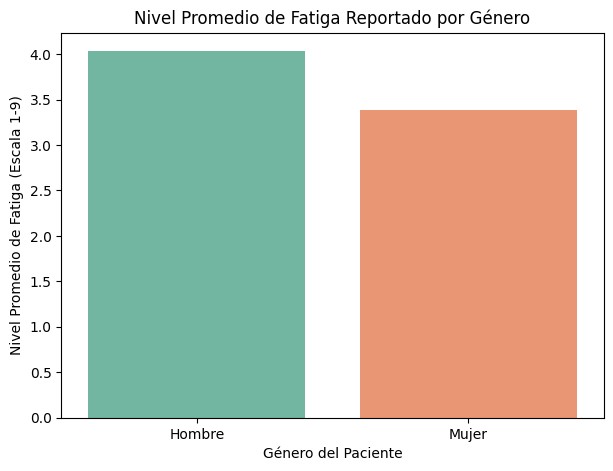

In [17]:
plt.figure(figsize=(7, 5))

sns.barplot(
    x='Gender_Text',
    y='Fatigue',
    data=data_nuevo,
    ci=None,
    estimator=np.mean,
    palette='Set2'
)

plt.title('Nivel Promedio de Fatiga Reportado por Género')
plt.xlabel('Género del Paciente')
plt.ylabel('Nivel Promedio de Fatiga (Escala 1-9)')
plt.show()

Análisis de Resultados:

1.Género 'Hombre': El nivel promedio de fatiga reportado es aproximadamente 4.0 en la escala de 1 a 9.

2.Género 'Mujer': El nivel promedio de fatiga reportado es aproximadamente 3.4.

 La gráfica indica claramente que los pacientes Hombres reportan, en promedio, un nivel de fatiga significativamente mayor (aproximadamente 17% más alto) que las pacientes Mujeres. Esta diferencia es un hallazgo clave que podría influir en cómo se evalúan y manejan los síntomas post-diagnóstico según el género.

Edad vs Fatiga

/tmp/ipython-input-2352569308.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-2352569308.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


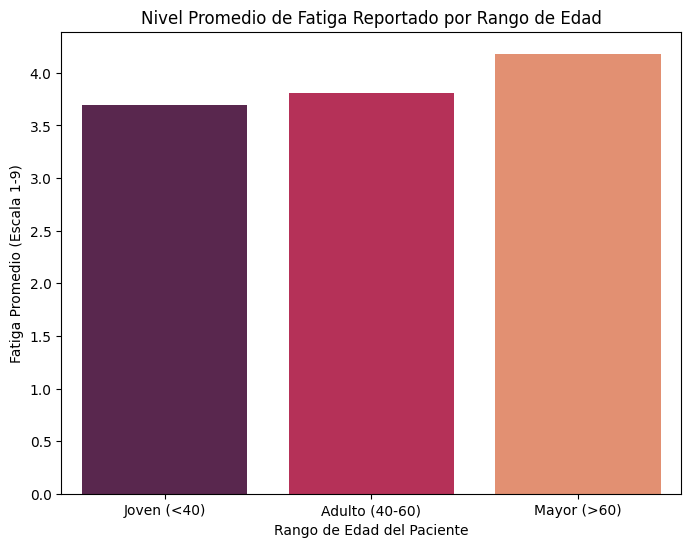

In [18]:
orden_edad = ['Joven (<40)', 'Adulto (40-60)', 'Mayor (>60)']

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Rango_Edad',
    y='Fatigue',
    data=data_nuevo,
    ci=None,
    estimator=np.mean,
    palette='rocket',
    order=orden_edad
)
plt.title('Nivel Promedio de Fatiga Reportado por Rango de Edad')
plt.xlabel('Rango de Edad del Paciente')
plt.ylabel('Fatiga Promedio (Escala 1-9)')
plt.show()

Análisis:

1.Tendencia: Existe una relación directa y progresiva entre la edad del paciente y la intensidad promedio de la fatiga reportada.

2.Valores: La fatiga promedio aumenta de 3.7 en el grupo Joven a 3.8 en el Adulto, alcanzando su pico más alto en el grupo Mayor, con 4.1.

Este gráfico de barras confirma de manera contundente la progresión de la Fatiga. Aunque es un síntoma común de la enfermedad en todas las edades, su intensidad promedio es significativamente mayor en los pacientes más mayores, lo que sugiere que el factor edad agrava la percepción de este síntoma.e.

conclusiones

1.Factores Impulsores: El riesgo de cáncer de pulmón está fuertemente correlacionado con el uso de alcohol y el riesgo genético, y la severidad máxima se debe a la acumulación extrema de factores de riesgo.

2.El Acelerador: El tabaquismo activo es el catalizador que más impacta la progresión de la enfermedad hacia el nivel de riesgo más alto (High).

3.Vulnerabilidad: La enfermedad se manifiesta fuertemente en la mediana edad, y el riesgo más alto se concentra en los extremos (Jóvenes y Mayores).

